In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
!kaggle datasets download noorsaeed/resume-datasets

Dataset URL: https://www.kaggle.com/datasets/noorsaeed/resume-datasets
License(s): MIT
 98% 139M/142M [00:01<00:00, 105MB/s]
100% 142M/142M [00:01<00:00, 109MB/s]


In [3]:
!unzip resume-datasets.zip -d resume-datasets

Archive:  resume-datasets.zip
  inflating: resume-datasets/clean_resume_data.csv  
  inflating: resume-datasets/jobs_dataset_with_features.csv  


In [4]:
df = pd.read_csv("/content/resume-datasets/clean_resume_data.csv")
df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [5]:
print(f"Shape of dataset is {df.shape}")

Shape of dataset is (2484, 3)


In [6]:
df['Category'].value_counts()

,count
Category,
INFORMATION-TECHNOLOGY,120
BUSINESS-DEVELOPMENT,120
FINANCE,118
ADVOCATE,118
ACCOUNTANT,118
ENGINEERING,118
CHEF,118
AVIATION,117
FITNESS,117


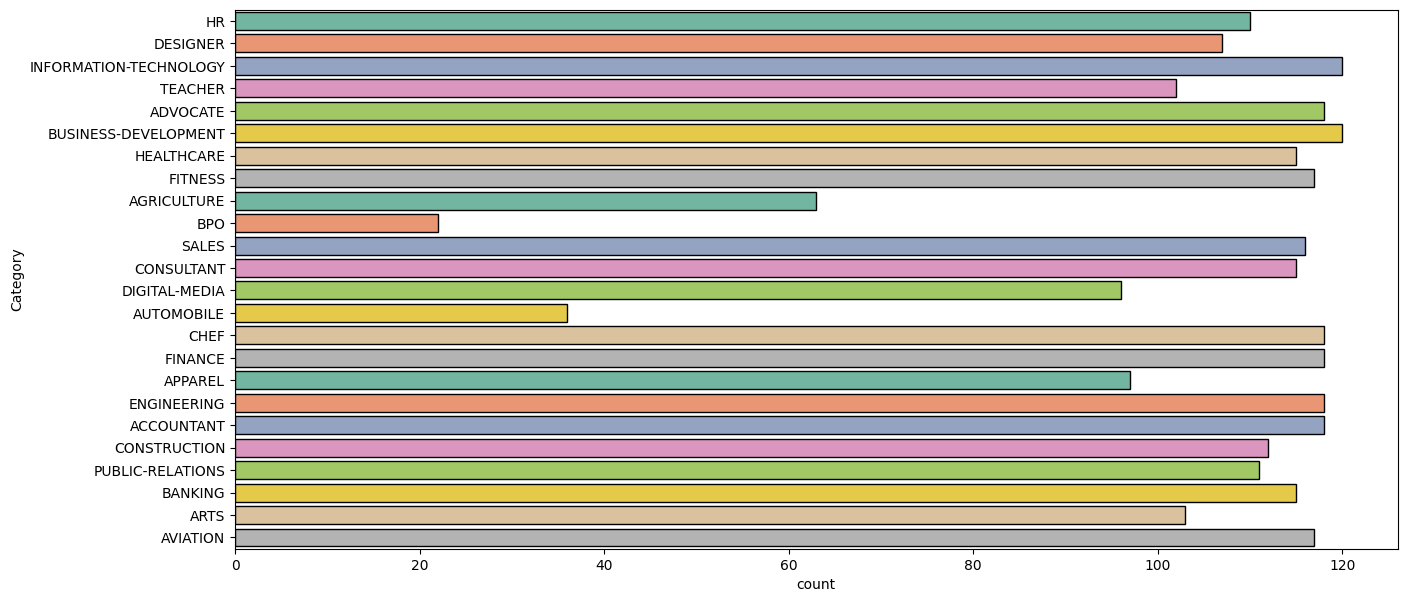

In [7]:
plt.figure(figsize=(15, 7))
sns.countplot(df['Category'], palette='Set2', edgecolor='black')
plt.xticks(rotation=0)
plt.savefig("Countplot of Job Categories")
plt.show()

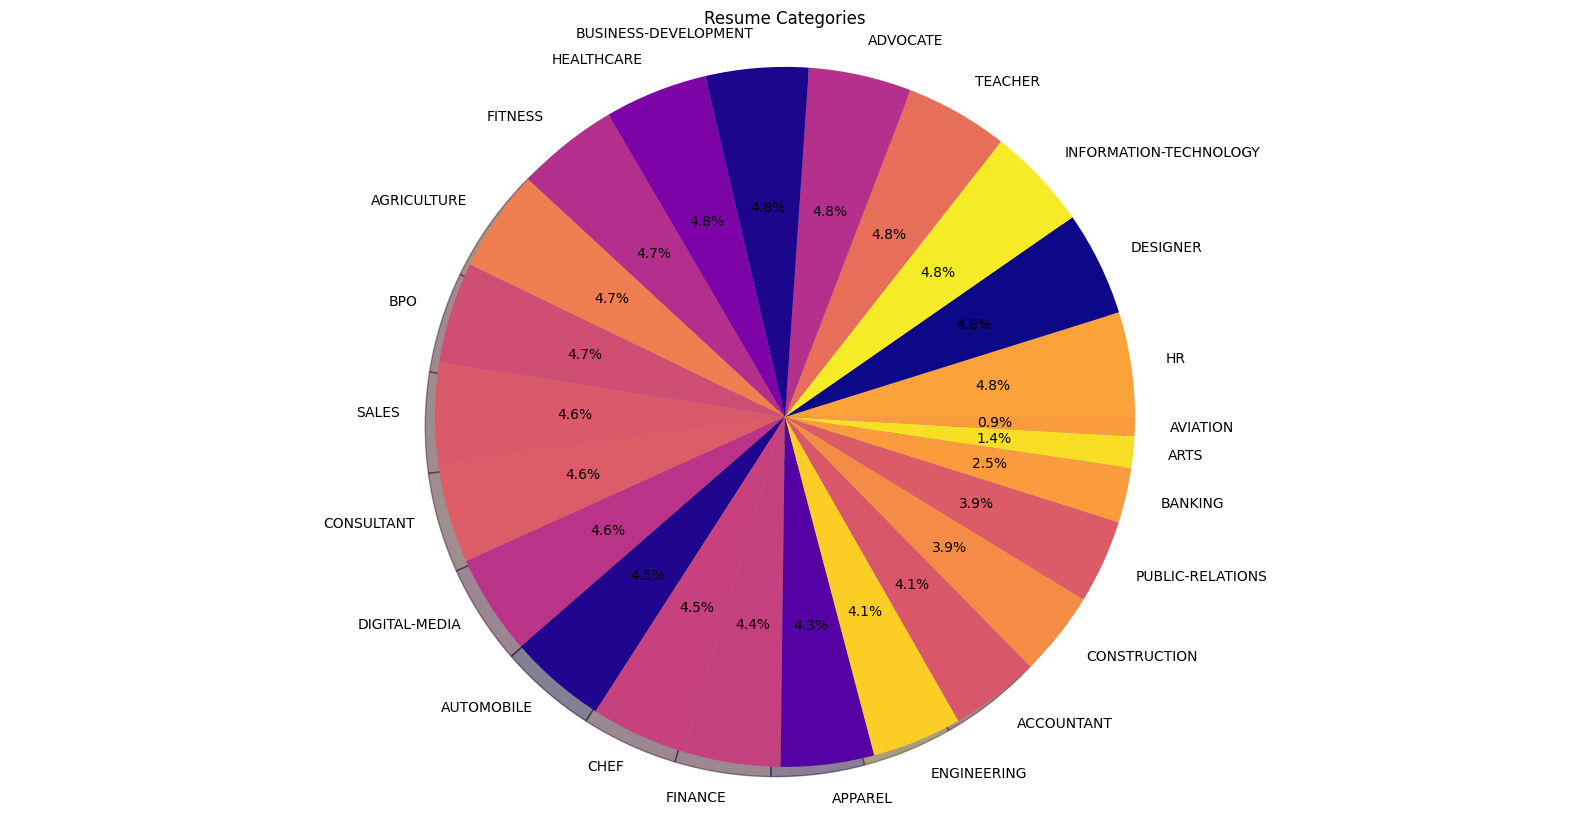

In [8]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

plt.figure(figsize=(20,10))

plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=plt.cm.plasma(np.random.rand(len(labels))))
plt.axis('equal')
plt.title('Resume Categories')
plt.savefig("Pie Chart of Job Categories")
plt.show()

In [11]:
df['Category'].value_counts()

,count
Category,
INFORMATION-TECHNOLOGY,120
BUSINESS-DEVELOPMENT,120
FINANCE,118
ADVOCATE,118
ACCOUNTANT,118
ENGINEERING,118
CHEF,118
AVIATION,117
FITNESS,117


In [15]:
max_count = df['Category'].value_counts().max()

In [16]:
max_count

120

In [17]:
balanced_data = []

for category in df['Category'].unique():
  category_data = df[df['Category'] == category]
  if len(category_data) < max_count:
    balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
  else:
    balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
  balanced_data.append(balanced_category_data)

balanced_df = pd.concat(balanced_data)

In [18]:
balanced_df['Category'].value_counts()

,count
Category,
HR,120
DESIGNER,120
ARTS,120
BANKING,120
PUBLIC-RELATIONS,120
CONSTRUCTION,120
ACCOUNTANT,120
ENGINEERING,120
APPAREL,120


In [29]:
balanced_df.head()

,ID,Category,Feature
102,10399912,HR,hr personnel assistant summary u citizen autho...
51,39650734,HR,hr assistant summary hard worker dedicated det...
92,23510685,HR,global hr manager summary global hr profession...
14,27490876,HR,hr coordinator summary applicant screening bac...
106,24402267,HR,designation hr assistant professional summary ...


In [21]:
balanced_df.isnull().sum()

,0
ID,0
Category,0
Feature,1


In [22]:
balanced_df.dropna(inplace=True)

In [23]:
balanced_df.shape

(2879, 3)

In [24]:
x = balanced_df['Feature']
y = balanced_df['Category']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
print("Shape of Training Data")
print(f"Shape of x_train is {x_train.shape}")
print(f"Shape of y_train is {y_train.shape}")
print()
print("Shape of Testing Data")
print(f"Shape of x_test is {x_test.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of Training Data
Shape of x_train is (2303,)
Shape of y_train is (2303,)

Shape of Testing Data
Shape of x_test is (576,)
Shape of y_test is (576,)


In [30]:
vectorizer = TfidfVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [41]:
import joblib

joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

Accuracy Score: 0.8489583333333334

Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.80      0.95      0.87        21
              ADVOCATE       1.00      0.83      0.91        29
           AGRICULTURE       0.95      0.83      0.88        23
               APPAREL       0.95      0.86      0.90        21
                  ARTS       1.00      0.64      0.78        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.88      0.93      0.90        30
               BANKING       1.00      0.78      0.88        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.48      0.56      0.51        18
                  CHEF       0.96      0.96      0.96        28
          CONSTRUCTION       0.86      1.00      0.93        25
            CONSULTANT       0.90      0.61      0.73        31
              DESIGNER       0.89      0.86 

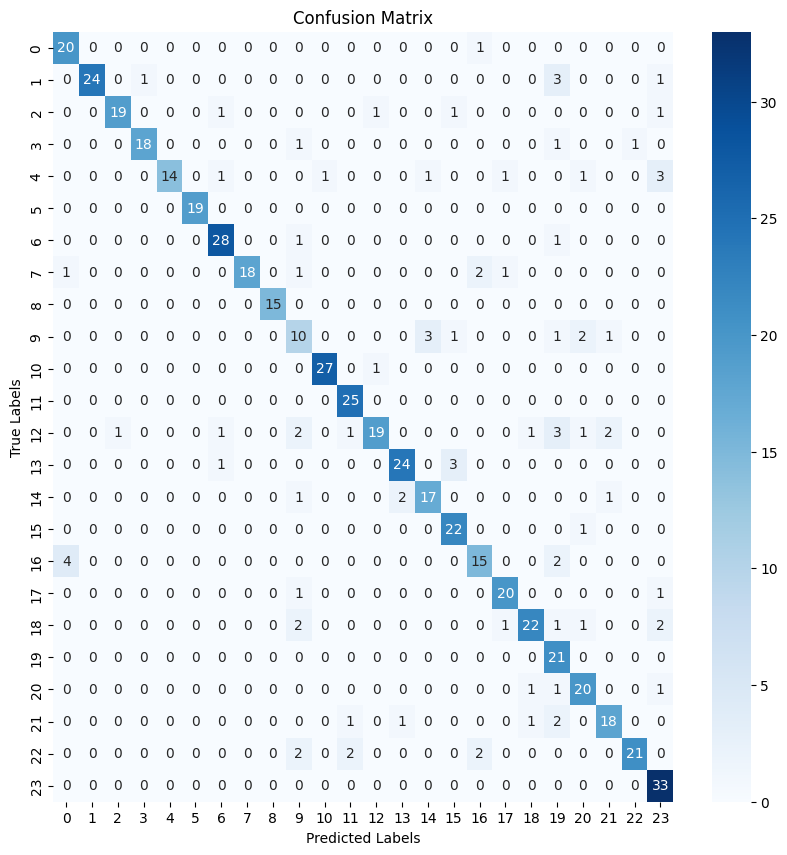

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

classifier = RandomForestClassifier()
classifier.fit(x_train_vectorized, y_train)
y_pred = classifier.predict(x_test_vectorized)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc}")
print()
cls_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{cls_report}")
print()
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
print()
prec = precision_score(y_test, y_pred, average='weighted')
print(f"Precision Score: {prec}")
print()
rec = recall_score(y_test, y_pred, average='weighted')
print(f"Recall Score: {rec}")
print()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")
print()

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig("Confusion Matrix")
plt.show()


IntProgress(value=0, description='Training:', max=2, style=ProgressStyle(bar_color='blue'))

Label(value='Starting GridSearchCV...')

Hyperparameter Tuning:   0%|          | 0/2 [00:00<?, ?model/s]

✅ Best Parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
📌 Best RandomForest model saved as 'best_RandomForest_model.pkl'

✅ Best Parameters for LogisticRegression: {'C': 10, 'solver': 'lbfgs'}
📌 Best LogisticRegression model saved as 'best_LogisticRegression_model.pkl'


=== RandomForest Model ===
🔹 Accuracy Score: 0.8350694444444444
🔹 Precision Score: 0.8563579003602153
🔹 Recall Score: 0.8350694444444444
🔹 F1 Score: 0.8360212868442392
📜 Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.81      1.00      0.89        21
              ADVOCATE       1.00      0.76      0.86        29
           AGRICULTURE       0.95      0.83      0.88        23
               APPAREL       0.94      0.81      0.87        21
                  ARTS       0.93      0.64      0.76        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.94      1.

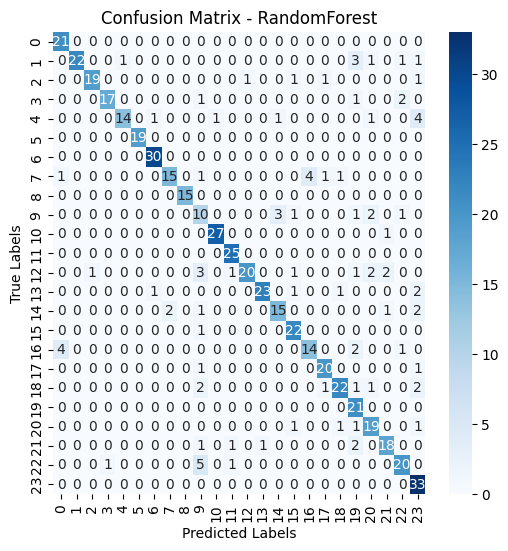


=== LogisticRegression Model ===
🔹 Accuracy Score: 0.8697916666666666
🔹 Precision Score: 0.8758240031060238
🔹 Recall Score: 0.8697916666666666
🔹 F1 Score: 0.8696469755878465
📜 Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.91      0.95      0.93        21
              ADVOCATE       0.88      0.79      0.84        29
           AGRICULTURE       0.83      0.83      0.83        23
               APPAREL       0.95      0.86      0.90        21
                  ARTS       0.85      0.77      0.81        22
            AUTOMOBILE       0.90      1.00      0.95        19
              AVIATION       0.88      0.93      0.90        30
               BANKING       1.00      0.78      0.88        23
                   BPO       0.94      1.00      0.97        15
  BUSINESS-DEVELOPMENT       0.59      0.72      0.65        18
                  CHEF       0.96      0.96      0.96        28
          CONSTRUCTION       0.

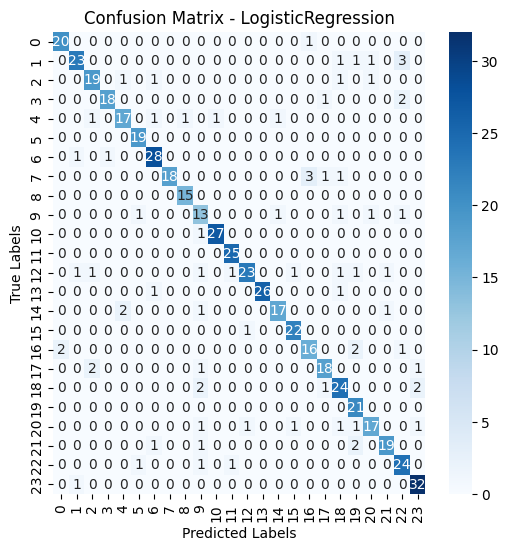

In [37]:
import joblib
import ipywidgets as widgets
from IPython.display import display
from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define classifiers and hyperparameter grids
models = {
    "RandomForest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [None, 10],
            "min_samples_split": [2, 5]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ["liblinear", "lbfgs"]
        }
    },
}

# Progress bar and status widget
progress_bar = widgets.IntProgress(min=0, max=len(models), description="Training:", style={'bar_color': 'blue'})
status_label = widgets.Label(value="Starting GridSearchCV...")
display(progress_bar, status_label)

# Perform GridSearchCV for each model
best_models = {}
for i, (name, model_info) in enumerate(tqdm(models.items(), desc="Hyperparameter Tuning", unit="model")):
    status_label.value = f"Training {name}..."

    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(x_train_vectorized, y_train)
    best_models[name] = grid_search.best_estimator_

    # Save the best model
    joblib.dump(grid_search.best_estimator_, f"best_{name}_model.pkl")

    print(f"✅ Best Parameters for {name}: {grid_search.best_params_}")
    print(f"📌 Best {name} model saved as 'best_{name}_model.pkl'\n")

    # Update progress bar
    progress_bar.value += 1

status_label.value = "Training Completed! Now evaluating models..."

# Evaluate the best models
for name, model in best_models.items():
    status_label.value = f"Evaluating {name}..."

    y_pred = model.predict(x_test_vectorized)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n=== {name} Model ===")
    print(f"🔹 Accuracy Score: {acc}")
    print(f"🔹 Precision Score: {prec}")
    print(f"🔹 Recall Score: {rec}")
    print(f"🔹 F1 Score: {f1}")
    print(f"📜 Classification Report:\n{classification_report(y_test, y_pred)}\n")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.savefig(f"Confusion_Matrix_{name}.png")  # Save confusion matrix
    plt.show()

status_label.value = "All models evaluated successfully! 🎉"


In [38]:
model = joblib.load("/content/best_LogisticRegression_model.pkl")

import re
def clean_resume(txt):
  clean_text = re.sub('http\S+\s*', ' ', txt)
  clean_text = re.sub('RT|cc', ' ', clean_text)
  clean_text = re.sub('#\S+', '', clean_text)
  clean_text = re.sub('@\S+', '  ', clean_text)
  clean_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_text)
  clean_text = re.sub(r'[^\x00-\x7f]',r' ', clean_text)
  clean_text = re.sub('\s+', ' ', clean_text)
  return clean_text

def predict_category(resume_text):
  resume_text = clean_resume(resume_text)
  resume_vectorized = vectorizer.transform([resume_text])
  predicted_category = model.predict(resume_vectorized)[0]
  return predicted_category

In [39]:
resume_file = """Objective:
A creative and detail-oriented Designer with a passion for visual communication and brand identity seeking opportunities to leverage design skills in a dynamic and collaborative environment.

Education:
- Bachelor of Fine Arts in Graphic Design, XYZ College, GPA: 3.7/4.0
- Diploma in Web Design, ABC Institute, GPA: 3.9/4.0

Skills:
- Proficient in Adobe Creative Suite (Photoshop, Illustrator, InDesign)
- Strong understanding of typography, layout, and color theory
- Experience in both print and digital design
- Ability to conceptualize and execute design projects from concept to completion
- Excellent attention to detail and time management skills

Experience:
Graphic Designer | XYZ Design Studio
- Created visually appealing graphics for various marketing materials, including brochures, flyers, and social media posts
- Collaborated with clients to understand their design needs and deliver creative solutions that align with their brand identity
- Worked closely with the marketing team to ensure consistency in brand messaging across all platforms

Freelance Designer
- Designed logos, branding materials, and website layouts for small businesses and startups
- Managed multiple projects simultaneously while meeting tight deadlines and maintaining quality standards
- Established and maintained strong client relationships through clear communication and exceptional service

Projects:
- Rebranding Campaign for XYZ Company: Led a team to redesign the company's logo, website, and marketing collateral, resulting in a 30% increase in brand recognition
- Packaging Design for ABC Product Launch: Developed eye-catching packaging designs for a new product line, contributing to a successful launch and positive customer feedback

Certifications:
- Adobe Certified Expert (ACE) in Adobe Illustrator
- Responsive Web Design Certification from Udemy

Languages:
- English (Native)
- Spanish (Intermediate)
"""


predicted_category = predict_category(resume_file)
print(f"Predicted Category: {predicted_category}")

Predicted Category: DESIGNER


In [40]:
resume_file = """Objective:
Dedicated and results-oriented Banking professional with a strong background in financial analysis and customer service seeking opportunities to contribute to a reputable financial institution. Eager to leverage expertise in risk management, investment strategies, and relationship building to drive business growth and client satisfaction.

Education:
- Bachelor of Business Administration in Finance, XYZ University, GPA: 3.8/4.0
- Certified Financial Analyst (CFA) Level I Candidate

Skills:
- Proficient in financial modeling and analysis using Excel, Bloomberg Terminal, and other financial software
- Extensive knowledge of banking products and services, including loans, mortgages, and investment products
- Strong understanding of regulatory compliance and risk management practices in the banking industry
- Excellent communication and interpersonal skills, with a focus on building rapport with clients and colleagues
- Ability to work efficiently under pressure and adapt to changing market conditions

Experience:
Financial Analyst | ABC Bank
- Conducted financial analysis and risk assessment for corporate clients, including credit analysis, financial statement analysis, and cash flow modeling
- Developed customized financial solutions to meet clients' needs and objectives, resulting in increased revenue and client retention
- Collaborated with cross-functional teams to identify new business opportunities and optimize existing processes

Customer Service Representative | DEF Bank
- Provided exceptional customer service to bank clients, addressing inquiries, resolving issues, and promoting banking products and services
- Processed transactions accurately and efficiently, including deposits, withdrawals, and account transfers
- Educated customers on various banking products and services, helping them make informed financial decisions

Internship | GHI Investments
- Assisted portfolio managers with investment research and analysis, including industry and company-specific research, financial modeling, and performance analysis
- Prepared investment presentations and reports for clients, highlighting investment opportunities and performance metrics
- Conducted market research and analysis to identify trends and opportunities in the financial markets

Certifications:
- Certified Financial Planner (CFP)
- Series 7 and Series 63 Securities Licenses

Languages:
- English (Native)
- Spanish (Proficient)

"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: BANKING


In [7]:
!pip install pdfminer.six

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 36.4 MB/s eta 0:00:00


In [9]:
import re
from pdfminer.high_level import extract_text

def extract_text_from_pdf(pdf_path):
    return extract_text(pdf_path)

resume = "/content/Teacher.pdf"
text = extract_text_from_pdf(resume)
print(text)

Objective: 

Passionate and dedicated educator with a commitment to fostering a positive learning environment and 
facilitating student success. Experienced in creating engaging lesson plans, implementing innovative 
teaching methods, and providing individualized support to students. Seeking a position as a high school 
English teacher to inspire and empower students to reach their full potential. 

Education: 

- Master of Arts in Teaching, University of Education, GPA: 4.0/4.0 

- Bachelor of Arts in English Literature, ABC University, GPA: 3.9/4.0 

- Teaching Certification in Secondary Education 

Skills: 

- Proficient in curriculum development and lesson planning, with a focus on differentiated instruction to 
accommodate diverse learning styles 

- Strong classroom management skills, fostering a supportive and inclusive learning environment 

- Excellent communication and interpersonal abilities, building positive relationships with students, 
parents, and colleagues 

- Technol

In [15]:
import re

def extract_contact_number(text):
  contact_no = None

  pattern = r"(?:(?:\+?([1-9]|[0-9][0-9]|[0-9][0-9][0-9])\s*(?:[.-]\s*)?)?(?:\(\s*([2-9])))"
  match = re.search(pattern, text)
  if match:
    contact_no = match.group(0)
  return contact_no

phone = extract_contact_number(text)
print(phone)

None


In [18]:
import re

def extract_education_details(text):
  education_details = []

  # Define a pattern to match education entries
  pattern = r"(?i)(?:(?:Bachelor|Master|Doctorate|Diploma|PhD|B\.A\.|M\.A\.|B\.Sc\.|M\.Sc\.)\s*(?:of|in)?\s*([\w\s,]+))\s*(?:(?:from|at)\s*([\w\s,]+))?\s*(?:(?:\((?:\d{4}|\d{4}-\d{4})\))?)"

  # Find all matches in the text
  matches = re.findall(pattern, text)

  # Extract education details from each match
  for match in matches:
    degree = match[0].strip()
    institution = match[1].strip() if match[1] else None

    education_details.append({
        "degree": degree,
        "institution": institution,
    })

  return education_details

# Example usage:
education_info = extract_education_details(text)
print(education_info)

[{'degree': 'Arts in Teaching, University of Education, GPA', 'institution': None}, {'degree': 'Arts in English Literature, ABC University, GPA', 'institution': None}]


In [21]:
import re

skills_list = [
    'Python', 'Data Analysis', 'Machine Learning', 'Communication', 'Project Management', 'Deep Learning', 'SQL', 'Tableau',
    'Java', 'C++', 'JavaScript', 'HTML', 'CSS', 'React', 'Angular', 'Node.js', 'MongoDB', 'Express.js', 'Git',
    'Research', 'Statistics', 'Quantitative Analysis', 'Qualitative Analysis', 'SPSS', 'R', 'Data Visualization', 'Matplotlib',
    'Seaborn', 'Plotly', 'Pandas', 'Numpy', 'Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'NLTK', 'Text Mining',
    'Natural Language Processing', 'Computer Vision', 'Image Processing', 'OCR', 'Speech Recognition', 'Recommendation Systems',
    'Collaborative Filtering', 'Content-Based Filtering', 'Reinforcement Learning', 'Neural Networks', 'Convolutional Neural Networks',
    'Recurrent Neural Networks', 'Generative Adversarial Networks', 'XGBoost', 'Random Forest', 'Decision Trees', 'Support Vector Machines',
    'Linear Regression', 'Logistic Regression', 'K-Means Clustering', 'Hierarchical Clustering', 'DBSCAN', 'Association Rule Learning',
    'Apache Hadoop', 'Apache Spark', 'MapReduce', 'Hive', 'HBase', 'Apache Kafka', 'Data Warehousing', 'ETL', 'Big Data Analytics',
    'Cloud Computing', 'Amazon Web Services (AWS)', 'Microsoft Azure', 'Google Cloud Platform (GCP)', 'Docker', 'Kubernetes', 'Linux',
    'Shell Scripting', 'Cybersecurity', 'Network Security', 'Penetration Testing', 'Firewalls', 'Encryption', 'Malware Analysis',
    'Digital Forensics', 'CI/CD', 'DevOps', 'Agile Methodology', 'Scrum', 'Kanban', 'Continuous Integration', 'Continuous Deployment',
    'Software Development', 'Web Development', 'Mobile Development', 'Backend Development', 'Frontend Development', 'Full-Stack Development',
    'UI/UX Design', 'Responsive Design', 'Wireframing', 'Prototyping', 'User Testing', 'Adobe Creative Suite', 'Photoshop', 'Illustrator',
    'InDesign', 'Figma', 'Sketch', 'Zeplin', 'InVision', 'Product Management', 'Market Research', 'Customer Development', 'Lean Startup',
    'Business Development', 'Sales', 'Marketing', 'Content Marketing', 'Social Media Marketing', 'Email Marketing', 'SEO', 'SEM', 'PPC',
    'Google Analytics', 'Facebook Ads', 'LinkedIn Ads', 'Lead Generation', 'Customer Relationship Management (CRM)', 'Salesforce',
    'HubSpot', 'Zendesk', 'Intercom', 'Customer Support', 'Technical Support', 'Troubleshooting', 'Ticketing Systems', 'ServiceNow',
    'ITIL', 'Quality Assurance', 'Manual Testing', 'Automated Testing', 'Selenium', 'JUnit', 'Load Testing', 'Performance Testing',
    'Regression Testing', 'Black Box Testing', 'White Box Testing', 'API Testing', 'Mobile Testing', 'Usability Testing', 'Accessibility Testing',
    'Cross-Browser Testing', 'Agile Testing', 'User Acceptance Testing', 'Software Documentation', 'Technical Writing', 'Copywriting',
    'Editing', 'Proofreading', 'Content Management Systems (CMS)', 'WordPress', 'Joomla', 'Drupal', 'Magento', 'Shopify', 'E-commerce',
    'Payment Gateways', 'Inventory Management', 'Supply Chain Management', 'Logistics', 'Procurement', 'ERP Systems', 'SAP', 'Oracle',
    'Microsoft Dynamics', 'Tableau', 'Power BI', 'QlikView', 'Looker', 'Data Warehousing', 'ETL', 'Data Engineering', 'Data Governance',
    'Data Quality', 'Master Data Management', 'Predictive Analytics', 'Prescriptive Analytics', 'Descriptive Analytics', 'Business Intelligence',
    'Dashboarding', 'Reporting', 'Data Mining', 'Web Scraping', 'API Integration', 'RESTful APIs', 'GraphQL', 'SOAP', 'Microservices',
    'Serverless Architecture', 'Lambda Functions', 'Event-Driven Architecture', 'Message Queues', 'GraphQL', 'Socket.io', 'WebSockets'
    'Ruby', 'Ruby on Rails', 'PHP', 'Symfony', 'Laravel', 'CakePHP', 'Zend Framework', 'ASP.NET', 'C#', 'VB.NET', 'ASP.NET MVC', 'Entity Framework',
    'Spring', 'Hibernate', 'Struts', 'Kotlin', 'Swift', 'Objective-C', 'iOS Development', 'Android Development', 'Flutter', 'React Native', 'Ionic',
    'Mobile UI/UX Design', 'Material Design', 'SwiftUI', 'RxJava', 'RxSwift', 'Django', 'Flask', 'FastAPI', 'Falcon', 'Tornado', 'WebSockets',
    'GraphQL', 'RESTful Web Services', 'SOAP', 'Microservices Architecture', 'Serverless Computing', 'AWS Lambda', 'Google Cloud Functions',
    'Azure Functions', 'Server Administration', 'System Administration', 'Network Administration', 'Database Administration', 'MySQL', 'PostgreSQL',
    'SQLite', 'Microsoft SQL Server', 'Oracle Database', 'NoSQL', 'MongoDB', 'Cassandra', 'Redis', 'Elasticsearch', 'Firebase', 'Google Analytics',
    'Google Tag Manager', 'Adobe Analytics', 'Marketing Automation', 'Customer Data Platforms', 'Segment', 'Salesforce Marketing Cloud', 'HubSpot CRM',
    'Zapier', 'IFTTT', 'Workflow Automation', 'Robotic Process Automation (RPA)', 'UI Automation', 'Natural Language Generation (NLG)',
    'Virtual Reality (VR)', 'Augmented Reality (AR)', 'Mixed Reality (MR)', 'Unity', 'Unreal Engine', '3D Modeling', 'Animation', 'Motion Graphics',
    'Game Design', 'Game Development', 'Level Design', 'Unity3D', 'Unreal Engine 4', 'Blender', 'Maya', 'Adobe After Effects', 'Adobe Premiere Pro',
    'Final Cut Pro', 'Video Editing', 'Audio Editing', 'Sound Design', 'Music Production', 'Digital Marketing', 'Content Strategy', 'Conversion Rate Optimization (CRO)',
    'A/B Testing', 'Customer Experience (CX)', 'User Experience (UX)', 'User Interface (UI)', 'Persona Development', 'User Journey Mapping', 'Information Architecture (IA)',
    'Wireframing', 'Prototyping', 'Usability Testing', 'Accessibility Compliance', 'Internationalization (I18n)', 'Localization (L10n)', 'Voice User Interface (VUI)',
    'Chatbots', 'Natural Language Understanding (NLU)', 'Speech Synthesis', 'Emotion Detection', 'Sentiment Analysis', 'Image Recognition', 'Object Detection',
    'Facial Recognition', 'Gesture Recognition', 'Document Recognition', 'Fraud Detection', 'Cyber Threat Intelligence', 'Security Information and Event Management (SIEM)',
    'Vulnerability Assessment', 'Incident Response', 'Forensic Analysis', 'Security Operations Center (SOC)', 'Identity and Access Management (IAM)', 'Single Sign-On (SSO)',
    'Multi-Factor Authentication (MFA)', 'Blockchain', 'Cryptocurrency', 'Decentralized Finance (DeFi)', 'Smart Contracts', 'Web3', 'Non-Fungible Tokens (NFTs)']

def extract_skills_from_resume(text, skills_list):
    skills = []

    for skill in skills_list:
        pattern = r"\b{}\b".format(re.escape(skill))
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            skills.append(skill)
    return skills


extracted_skills = extract_skills_from_resume(text, skills_list)
if extracted_skills:
    print("Skills:", extracted_skills)
else:
    print("No skills found")

Skills: ['Communication']


In [22]:
import re

def extract_education_from_resume(text):
    education = []

    # List of education keywords to match against
    education_keywords = [
        'Computer Science', 'Information Technology', 'Software Engineering', 'Electrical Engineering', 'Mechanical Engineering', 'Civil Engineering',
        'Chemical Engineering', 'Biomedical Engineering', 'Aerospace Engineering', 'Nuclear Engineering', 'Industrial Engineering', 'Systems Engineering',
        'Environmental Engineering', 'Petroleum Engineering', 'Geological Engineering', 'Marine Engineering', 'Robotics Engineering', 'Biotechnology',
        'Biochemistry', 'Microbiology', 'Genetics', 'Molecular Biology', 'Bioinformatics', 'Neuroscience', 'Biophysics', 'Biostatistics', 'Pharmacology',
        'Physiology', 'Anatomy', 'Pathology', 'Immunology', 'Epidemiology', 'Public Health', 'Health Administration', 'Nursing', 'Medicine', 'Dentistry',
        'Pharmacy', 'Veterinary Medicine', 'Medical Technology', 'Radiography', 'Physical Therapy', 'Occupational Therapy', 'Speech Therapy', 'Nutrition',
        'Sports Science', 'Kinesiology', 'Exercise Physiology', 'Sports Medicine', 'Rehabilitation Science', 'Psychology', 'Counseling', 'Social Work',
        'Sociology', 'Anthropology', 'Criminal Justice', 'Political Science', 'International Relations', 'Economics', 'Finance', 'Accounting', 'Business Administration',
        'Management', 'Marketing', 'Entrepreneurship', 'Hospitality Management', 'Tourism Management', 'Supply Chain Management', 'Logistics Management',
        'Operations Management', 'Human Resource Management', 'Organizational Behavior', 'Project Management', 'Quality Management', 'Risk Management',
        'Strategic Management', 'Public Administration', 'Urban Planning', 'Architecture', 'Interior Design', 'Landscape Architecture', 'Fine Arts',
        'Visual Arts', 'Graphic Design', 'Fashion Design', 'Industrial Design', 'Product Design', 'Animation', 'Film Studies', 'Media Studies',
        'Communication Studies', 'Journalism', 'Broadcasting', 'Creative Writing', 'English Literature', 'Linguistics', 'Translation Studies',
        'Foreign Languages', 'Modern Languages', 'Classical Studies', 'History', 'Archaeology', 'Philosophy', 'Theology', 'Religious Studies',
        'Ethics', 'Education', 'Early Childhood Education', 'Elementary Education', 'Secondary Education', 'Special Education', 'Higher Education',
        'Adult Education', 'Distance Education', 'Online Education', 'Instructional Design', 'Curriculum Development'
        'Library Science', 'Information Science', 'Computer Engineering', 'Software Development', 'Cybersecurity', 'Information Security',
        'Network Engineering', 'Data Science', 'Data Analytics', 'Business Analytics', 'Operations Research', 'Decision Sciences',
        'Human-Computer Interaction', 'User Experience Design', 'User Interface Design', 'Digital Marketing', 'Content Strategy',
        'Brand Management', 'Public Relations', 'Corporate Communications', 'Media Production', 'Digital Media', 'Web Development',
        'Mobile App Development', 'Game Development', 'Virtual Reality', 'Augmented Reality', 'Blockchain Technology', 'Cryptocurrency',
        'Digital Forensics', 'Forensic Science', 'Criminalistics', 'Crime Scene Investigation', 'Emergency Management', 'Fire Science',
        'Environmental Science', 'Climate Science', 'Meteorology', 'Geography', 'Geomatics', 'Remote Sensing', 'Geoinformatics',
        'Cartography', 'GIS (Geographic Information Systems)', 'Environmental Management', 'Sustainability Studies', 'Renewable Energy',
        'Green Technology', 'Ecology', 'Conservation Biology', 'Wildlife Biology', 'Zoology']

    for keyword in education_keywords:
        pattern = r"(?i)\b{}\b".format(re.escape(keyword))
        match = re.search(pattern, text)
        if match:
            education.append(match.group())

    return education

extracted_education = extract_education_from_resume(text)
if extracted_education:
    print("Education:", extracted_education)
else:
    print("No education information found")

Education: ['management', 'English Literature', 'Education', 'Secondary Education']


In [23]:
def extract_name_from_resume(text):
    name = None

    # Use regex pattern to find a potential name
    pattern = r"(\b[A-Z][a-z]+\b)\s(\b[A-Z][a-z]+\b)"
    match = re.search(pattern, text)
    if match:
        name = match.group()

    return name

name = extract_name_from_resume(text)

if name:
    print("Name:", name)
else:
    print("Name not found")

Name: English Literature
